In [13]:
#Read 2 arrays x,y containing floating point value
import tensorflow as tf

sess = tf.Session()

a=tf.constant([1.0,5.0,6.0,3.0,5.0,6.0,8.0,4.0])
b=tf.constant([3.0,6.0,7.0,8.0,9.0,5.0,6.0,4.0])

#mean of x and y
x=tf.reduce_mean(a)
y=tf.reduce_mean(b)

#varience of x
v_x= tf.add(a,-x)
#y=tf.multiply(x,x)
sess.run(v_x)

v_x1=tf.multiply(v_x,v_x)
sess.run(v_x1)

g=tf.reduce_sum(v_x1)
g=tf.to_float(g)
sess.run(g)

i = b.get_shape()
i=tf.to_float(i)

variance=tf.div(g,i)
sess.run(variance)
            
#covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))         
j=tf.subtract(a,x)
k=tf.subtract(b,y)
p=tf.multiply(j,k)
covariance=tf.reduce_sum(p)
sess.run(covariance)
            
#m=covariance(x,y)/variance(x)         
m = tf.div(covariance,variance)
sess.run(m)

# c=mean(y)-m*mean(x)
c=tf.subtract(y,tf.multiply(m,x))
sess.run(c)

# y = mx+c
slope=tf.add(tf.multiply(m,b),c)
sess.run(slope)
    

print("Mean of x: ",sess.run(x))
print("Mean of y: ",sess.run(y))
print("Variance of x: ",sess.run(variance))
print("covariance(x,y): ",sess.run(covariance))
print("Value of m: ",sess.run(m))
print("Value of c: ",sess.run(c))
print("Value of y1: ",sess.run(slope))

    


Mean of x:  4.75
Mean of y:  6.0
Variance of x:  [ 3.9375]
covariance(x,y):  10.0
Value of m:  [ 2.53968263]
Value of c:  [-6.06349277]
Value of y1:  [  1.55555534   9.17460346  11.71428585  14.25396824  16.79365158
   6.63492012   9.17460346   4.09523773]


Value of y:  [ 3.  6.  7.  8.  9.  5.  6.  4.]
Value of y1:  [  1.55555534   9.17460346  11.71428585  14.25396824  16.79365158
   6.63492012   9.17460346   4.09523773]


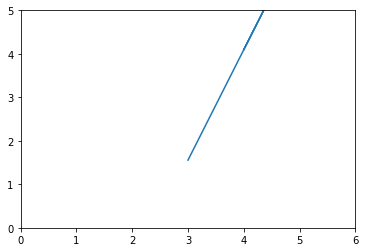

Root mean square error: 4.28664


In [15]:
import matplotlib.pyplot  as plt

val1=tf.constant(0.0)
err1=tf.constant(0.0)

with tf.Session() as sess:
    print("Value of y: ",sess.run(b))
    print("Value of y1: ",sess.run(slope))


    plt.plot(sess.run(b),sess.run(slope))
    plt.axis([0,6,0,5])
    plt.show()


# RMSE = sqrt(mean((y-y_pred).^2))


    cost = tf.reduce_sum(tf.pow(slope-b, 2))/(len(sess.run(a)))
    cost = tf.sqrt(cost)
               
    print("Root mean square error:",sess.run(cost))